In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [4]:
#Loading fashion mnist dataset

fmnist = tf.keras.datasets.fashion_mnist

In [5]:
##Load data gives 2 tuples of 2 lists each one for training and other for testing

(training_images,training_labels), (testing_images,testing_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


##Lets take a look at how the data is

Label: 6
Image pixel array: [[  0   0   0   0   0   1   2   0   0   0   0  58  88 102  78 100 128  94   0   0   0   0   0   2   0   0   0   0]
 [  0   0   0   0   1   1   1   2   0   0   9 212 171 195 176 222 188 186  59   0   1   1   3   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 184 174 187 165 182 139 137 208 161  31   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0  77 134 181 198 182 228 183 161 134 220 184 210 188 168  92   0   0   0   0   0   0]
 [  0   0   0   0   0   0 104 199 193 168 143 129 193 143 190 164 151 120 120 140 192 187 143   0   0   0   0   0]
 [  0   0   0   0   0   1 164 174 135 107 126 115 169 139 102 216 143 110 119 124 166 114 151  69   0   0   0   0]
 [  0   0   0   0   0  58 224 195 139 133 123 117 187 160 130 125 156 114 151 104 212 134 209 124   0   0   0   0]
 [  0   0   0   0   0 116 196 180 183 148 122 110  91 227  81 185 238 170 156  81 145  60 176 162   0   0   0   0]
 [  0   0   0   0   0 153 149 190 208 199 142  96 18

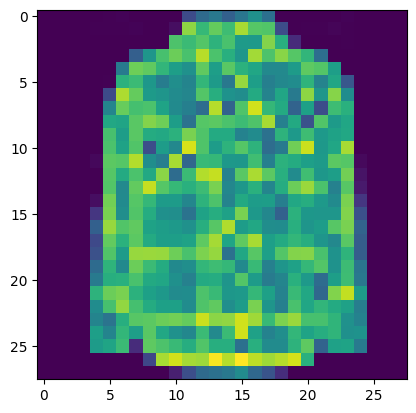

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# this varies from 0 to 59999
index=32

#no of characters per row
np.set_printoptions(linewidth=320)

print(f'Label: {training_labels[index]}')
print(f'Image pixel array: {training_images[index]}')

plt.imshow(training_images[index])

##Normalization

In [9]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
testing_images = testing_images / 255.0

##Building the model

In [10]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

##Adding optimizer and fitting the model

In [11]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images,training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4988 - accuracy: 0.8238
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3731 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3332 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3113 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2934 - accuracy: 0.8914


##evaluation with test data

In [13]:
model.evaluate(testing_images,testing_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.3502 - accuracy: 0.8736


[0.35019245743751526, 0.8736000061035156]

##Exercises


In [15]:
classifications = model.predict(testing_images)

print(classifications[0])

313/313 [==============================] - 1s 2ms/step
[8.6456212e-06 1.0352353e-08 4.3679655e-08 5.3225144e-09 3.2998520e-07 9.8987641e-03 3.7409876e-07 2.2485271e-02 3.2768592e-05 9.6757376e-01]


As you can see form the listed out probabilities from
the Softmax function the greatest probability is chosen which would be 9


In [16]:
print(testing_labels[0])

9


##Increased to 512 neurons

In [20]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)



Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4705
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3553
Epoch 3/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3205
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2965
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.3493


0.34926387667655945

##Implementation of callback

In [27]:
import tensorflow as tf

# Instantiate the dataset API
fmnist = tf.keras.datasets.fashion_mnist

# Load the dataset
(x_train, y_train),(x_test, y_test) = fmnist.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>=0.7):
      print("\nAccuracy is greater than 0.7 so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.4765 - accuracy: 0.8304
Accuracy is greater than 0.7 so cancelling training!
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4765 - accuracy: 0.8303
